In [1]:
import pickle

# 加载文件
filename = "semantic_analysis_enhanced_epoch_100.pkl"  # 替换为一个具体的文件路径
with open(filename, "rb") as f:
    data = pickle.load(f)

# 打印数据结构
print(data.keys())  # 顶层键
print(data["layer1"]["questions"])  # 假设数据在 layer1


dict_keys(['epoch', 'layer1', 'layer2', 'layer3', 'layer4'])
['Pine ISA Living thing', 'Pine ISA Plant', 'Pine ISA Animal', 'Oak ISA Living thing', 'Oak ISA Plant', 'Oak ISA Animal', 'Rose ISA Living thing', 'Rose ISA Plant', 'Rose ISA Animal', 'Daisy ISA Living thing', 'Daisy ISA Plant', 'Daisy ISA Animal', 'Robin ISA Living thing', 'Robin ISA Plant', 'Robin ISA Animal', 'Canary ISA Living thing', 'Canary ISA Plant', 'Canary ISA Animal', 'Sunfish ISA Living thing', 'Sunfish ISA Plant', 'Sunfish ISA Animal', 'Salmon ISA Living thing', 'Salmon ISA Plant', 'Salmon ISA Animal']


In [2]:
import pickle
import os

# 定义文件夹路径和 epoch 范围
file_folder = "./"  # 保存 .pkl 文件的文件夹
epochs = range(100, 5001, 100)  # 假设每 100 个 epoch 保存一次

# 初始化一个字典保存所有预测数据
all_layer_predictions = {}

# 遍历所有 epoch 的文件
for epoch in epochs:
    filename = os.path.join(file_folder, f"semantic_analysis_enhanced_epoch_{epoch}.pkl")
    if os.path.exists(filename):
        with open(filename, "rb") as f:
            data = pickle.load(f)
        
        # 提取每一层的数据
        epoch_data = {}
        for layer in ["layer1", "layer2", "layer3", "layer4"]:
            if layer in data:
                questions = data[layer]["questions"]
                predictions = data[layer]["answers"]  # 假设预测概率存储在 "answers"
                
                # 保存当前层的数据
                epoch_data[layer] = {
                    "questions": questions,
                    "predictions": predictions
                }
            else:
                print(f"'{layer}' not found in {filename}")
        
        # 保存当前 epoch 的所有层数据
        all_layer_predictions[epoch] = epoch_data
    else:
        print(f"File not found: {filename}")

# 打印提取结果
print(f"Extracted predictions for {len(all_layer_predictions)} epochs.")


Extracted predictions for 50 epochs.


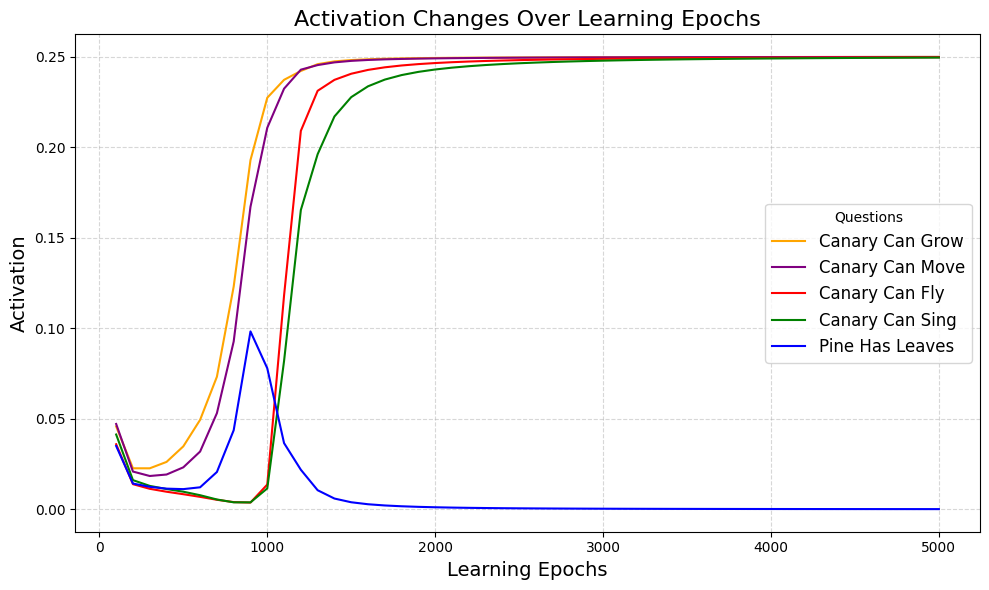

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 `all_layer_predictions` 是保存了所有 layer 和 epoch 数据的字典
# 示例提取问题
selected_questions = [
    "Canary Can Grow",
    "Canary Can Move",
    "Canary Can Fly",
    "Canary Can Sing",
    "Pine Has Leaves"
]

# 创建一个字典用于存储每个问题的激活值，按 layer 和 epoch
activation_data = {question: [] for question in selected_questions}

# 遍历所有 epochs 和 layers 提取数据
epochs = sorted(all_layer_predictions.keys())  # 获取所有 epoch
layers = ["layer1", "layer2", "layer3", "layer4"]  # 假设有 4 层

for question in selected_questions:
    question_activations = []  # 存储该问题的所有 epoch 激活值

    for epoch in epochs:
        epoch_data = []  # 每个 epoch 的激活值（按层叠加）

        for layer in layers:
            # 获取当前 layer 中的 questions 和 predictions
            questions = all_layer_predictions[epoch][layer]["questions"]
            predictions = all_layer_predictions[epoch][layer]["predictions"]

            # 如果问题存在于当前 layer 的问题中，提取激活值
            if question in questions:
                index = questions.index(question)
                epoch_data.append(predictions[index])
            else:
                epoch_data.append(0.0)  # 如果问题不存在于当前 layer，填充 0

        # 保存每个 epoch 的平均激活值
        question_activations.append(np.mean(epoch_data))

    # 存储到最终字典中
    activation_data[question] = question_activations

# 绘制曲线图
plt.figure(figsize=(10, 6))
colors = ["orange", "purple", "red", "green", "blue"]

for i, question in enumerate(selected_questions):
    plt.plot(epochs, activation_data[question], label=question, color=colors[i])

plt.title("Activation Changes Over Learning Epochs", fontsize=16)
plt.xlabel("Learning Epochs", fontsize=14)
plt.ylabel("Activation", fontsize=14)
plt.legend(title="Questions", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# 保存图像
plt.savefig("activation_changes_all_layers.png", dpi=300)
plt.show()


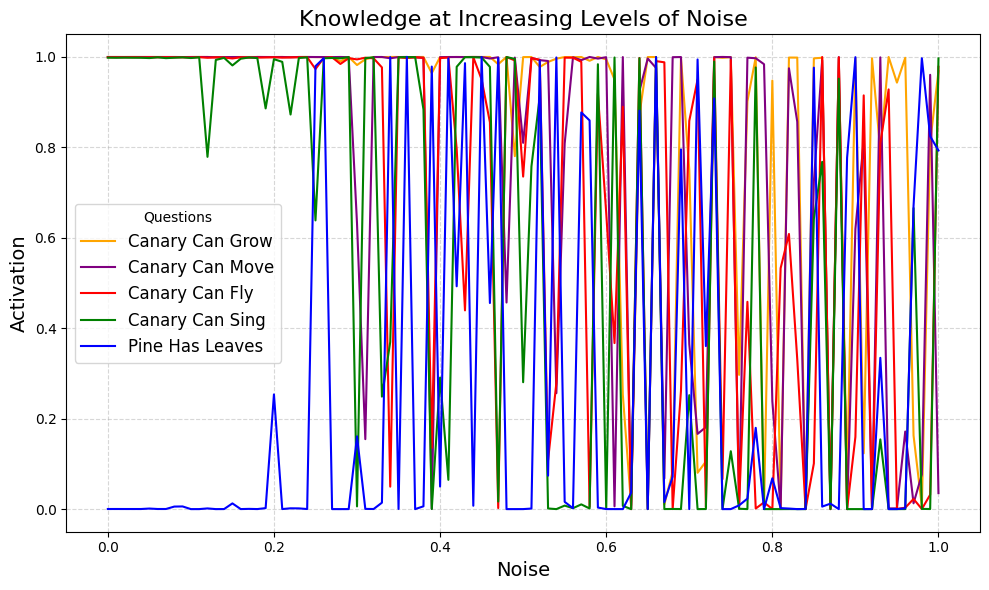

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 定义保存文件夹路径和文件名格式
file_folder = "./"  # 保存的 .pkl 文件的文件夹
noise_levels = np.arange(0.0, 1.01, 0.01)  # 噪声级别

def load_saved_results(noise_levels, file_folder):
    """加载保存的文件数据"""
    all_results = {}
    for noise in noise_levels:
        filename = os.path.join(file_folder, f"embedding_layer_noise_predictions_{noise}.pkl")
        if os.path.exists(filename):
            with open(filename, "rb") as f:
                data = pickle.load(f)
            all_results[noise] = data
        else:
            print(f"File not found: {filename}")
    return all_results

# 加载保存的嵌入层噪声预测结果
all_results = load_saved_results(noise_levels, file_folder)

# 定义待绘制的选定问题
selected_questions = [
    "Canary Can Grow",
    "Canary Can Move",
    "Canary Can Fly",
    "Canary Can Sing",
    "Pine Has Leaves"
]

# 创建一个字典用于存储噪声级别对应的激活值
activation_data = {question: [] for question in selected_questions}

# 遍历所有噪声级别提取激活值
for noise, results in all_results.items():
    for question in selected_questions:
        question_activations = []

        for layer in ["layer1", "layer2", "layer3", "layer4"]:
            layer_questions = results[layer]["questions"]
            layer_predictions = results[layer]["predictions"]

            # 如果问题存在于当前层的 question 列表中，提取激活值
            if question in layer_questions:
                index = layer_questions.index(question)
                question_activations.append(layer_predictions[index])

        # 计算该噪声级别下每个问题的平均激活值（只考虑存在的层）
        if question_activations:  # 如果存在有效层
            activation_data[question].append(np.mean(question_activations))
        else:
            activation_data[question].append(0.0)  # 如果所有层都不存在，填充 0

# 绘制图像
plt.figure(figsize=(10, 6))
colors = ["orange", "purple", "red", "green", "blue"]

for i, question in enumerate(selected_questions):
    plt.plot(noise_levels, activation_data[question], label=question, color=colors[i])

plt.title("Knowledge at Increasing Levels of Noise", fontsize=16)
plt.xlabel("Noise", fontsize=14)
plt.ylabel("Activation", fontsize=14)
plt.legend(title="Questions", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# 保存和展示图像
plt.savefig("knowledge_increasing_noise.png", dpi=300)
plt.show()

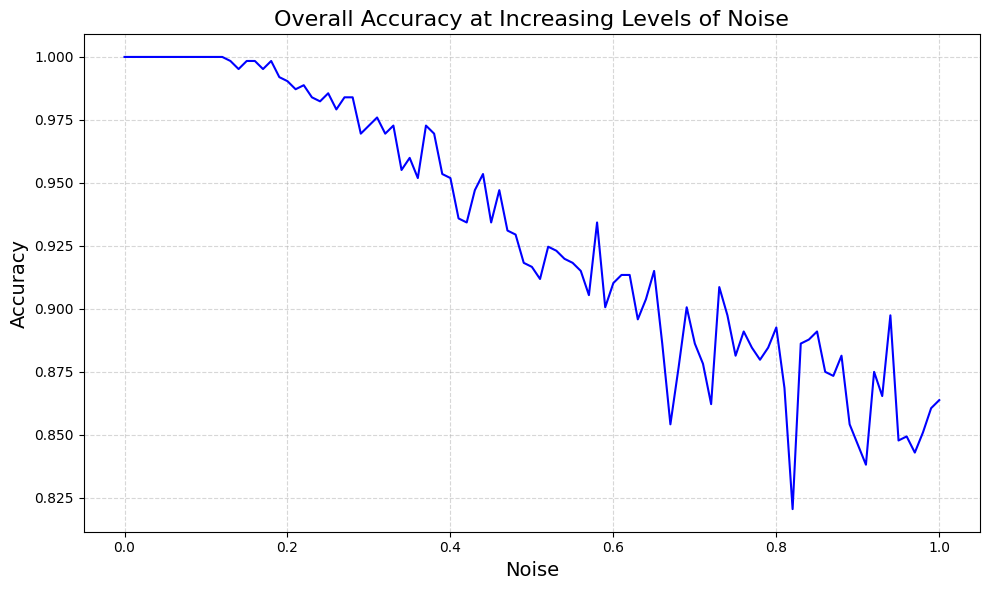

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# 定义保存文件夹路径和文件名格式
file_folder = "./"  # 保存的 .pkl 文件的文件夹
noise_levels = np.arange(0.0, 1.01, 0.01)  # 噪声级别

# 加载问题和答案
qa_df = pd.read_csv("processed_qa_pairs.csv")  # 请确保路径正确
questions = qa_df['Question'].values  # 问题列表
answers = qa_df['Answer'].map({"Yes": 1, "No": 0}).values  # 标签列表，"Yes" -> 1, "No" -> 0

def load_saved_results(noise_levels, file_folder):
    """加载保存的文件数据"""
    all_results = {}
    for noise in noise_levels:
        filename = os.path.join(file_folder, f"embedding_layer_noise_predictions_{noise}.pkl")
        if os.path.exists(filename):
            with open(filename, "rb") as f:
                data = pickle.load(f)
            all_results[noise] = data
        else:
            print(f"File not found: {filename}")
    return all_results

# 加载保存的嵌入层噪声预测结果
all_results = load_saved_results(noise_levels, file_folder)

# 初始化正确率列表
accuracy_data = []

# 遍历所有噪声级别计算正确率
for noise, results in all_results.items():
    correct_count = 0
    total_count = 0

    for layer in ["layer1", "layer2", "layer3", "layer4"]:
        layer_questions = results[layer]["questions"]
        layer_predictions = results[layer]["predictions"]

        # 遍历真实问题，比较预测值和真实值
        for i, question in enumerate(questions):
            if question in layer_questions:
                index = layer_questions.index(question)
                predicted = 1 if layer_predictions[index] > 0.5 else 0  # 假设阈值 0.5
                correct_count += int(predicted == answers[i])
                total_count += 1

    # 计算该噪声级别下的正确率
    accuracy = correct_count / total_count if total_count > 0 else 0.0
    accuracy_data.append(accuracy)

# 绘制正确率图
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, accuracy_data, label="Overall Accuracy", color="blue")
plt.title("Overall Accuracy at Increasing Levels of Noise", fontsize=16)
plt.xlabel("Noise", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# 保存和展示图像
plt.savefig("overall_accuracy_noise.png", dpi=300)
plt.show()


In [6]:
import pickle
import numpy as np
import pandas as pd
import os

# 定义保存文件夹路径和文件名格式
file_folder = "./"  # 保存的 .pkl 文件的文件夹
noise_levels = np.arange(0.0, 1.01, 0.01)  # 噪声级别

# 加载问题和答案
qa_df = pd.read_csv("processed_qa_pairs.csv")  # 请确保路径正确
questions = qa_df['Question'].values  # 问题列表
answers = qa_df['Answer'].map({"Yes": 1, "No": 0}).values  # 标签列表，"Yes" -> 1, "No" -> 0

def load_saved_results(noise_levels, file_folder):
    """加载保存的文件数据"""
    all_results = {}
    for noise in noise_levels:
        filename = os.path.join(file_folder, f"embedding_layer_noise_predictions_{noise}.pkl")
        if os.path.exists(filename):
            with open(filename, "rb") as f:
                data = pickle.load(f)
            all_results[noise] = data
        else:
            print(f"File not found: {filename}")
    return all_results

# 加载保存的嵌入层噪声预测结果
all_results = load_saved_results(noise_levels, file_folder)

# 初始化存储所有噪声级别结果的列表
data_records = []

# 遍历所有噪声级别提取数据
for noise, results in all_results.items():
    for layer in ["layer1", "layer2", "layer3", "layer4"]:
        layer_questions = results[layer]["questions"]
        layer_predictions = results[layer]["predictions"]

        # 遍历真实问题，记录预测值和正确答案
        for i, question in enumerate(questions):
            if question in layer_questions:
                index = layer_questions.index(question)
                predicted = layer_predictions[index]
                data_records.append({
                    "Noise Level": noise,
                    "Question": question,
                    "Predicted Answer": predicted,
                    "Correct Answer": answers[i]
                })

# 转换为 DataFrame
results_df = pd.DataFrame(data_records)

# 保存 DataFrame 到 CSV 文件
results_df.to_csv("noise_predictions_results.csv", index=False)

print("Data saved to noise_predictions_results.csv")


Data saved to noise_predictions_results.csv


['Canary Can Grow', 'Canary Can Move', 'Canary Can Fly', 'Canary Can Sing', 'Pine Has Leaves']


<Figure size 1000x600 with 0 Axes>

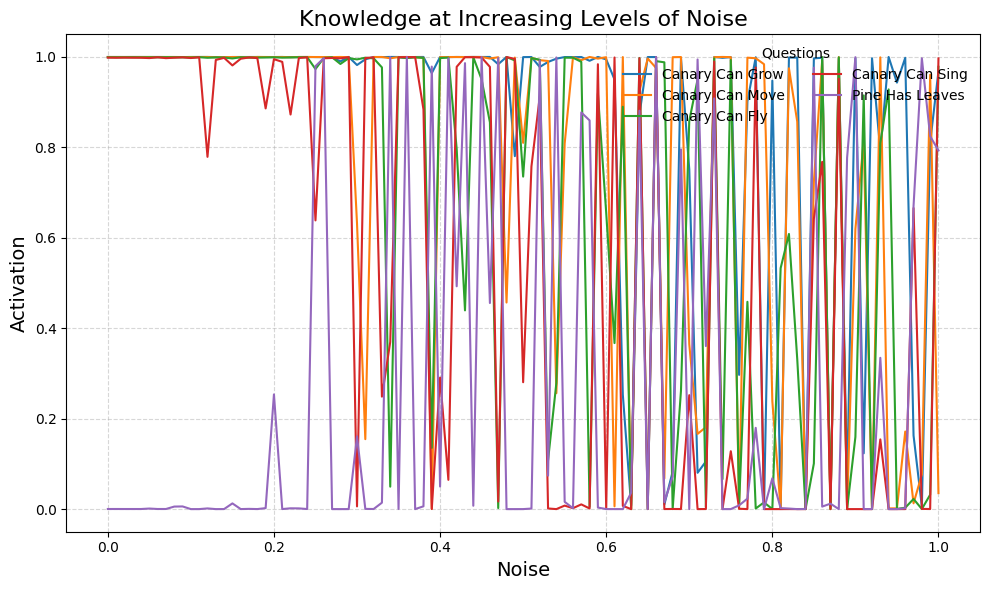

In [7]:
data = pd.read_csv("noise_predictions_results.csv")

# 绘制单个问题的激活值变化
yes_data = data[data["Correct Answer"] == 1]
# selected_questions = list(data["Question"])
print(selected_questions)
selected_questions = [
    "Canary Can Grow",
    "Canary Can Move",
    "Canary Can Fly",
    "Canary Can Sing",
    "Pine Has Leaves"
]
plt.figure(figsize=(10, 6))
# 使用动态生成的颜色列表
from itertools import cycle

plt.figure(figsize=(10, 6))
color_cycle = cycle(plt.cm.tab10.colors)  # 动态生成颜色循环器

for question in selected_questions:
    question_data = data[data["Question"] == question]
    activation_means = question_data.groupby("Noise Level")["Predicted Answer"].mean()

    plt.plot(
        activation_means.index,
        activation_means.values,
        label=question,
        color=next(color_cycle)  # 自动从颜色循环中取颜色
    )

plt.title("Knowledge at Increasing Levels of Noise", fontsize=16)
plt.xlabel("Noise", fontsize=14)
plt.ylabel("Activation", fontsize=14)
plt.legend(title="Questions", fontsize=10, loc="upper right", ncol=2, frameon=False)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# 保存图像
plt.savefig("knowledge_increasing_noise_dynamic_colors.png", dpi=300)
plt.show()


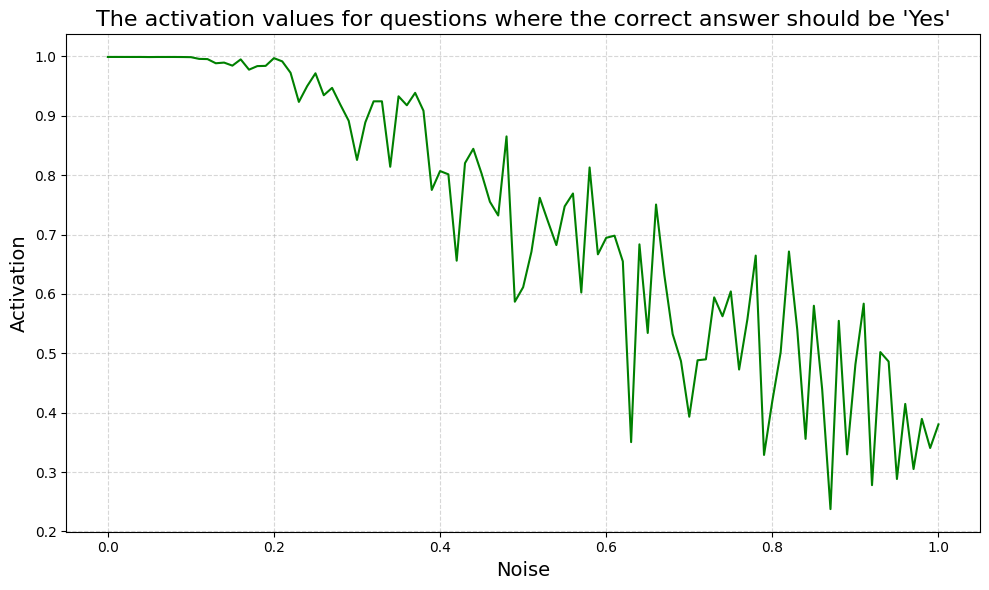

C:\Users\Rimersa\AppData\Local\Temp\ipykernel_10160\2202008751.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yes_accuracy = yes_data.groupby("Noise Level").apply(


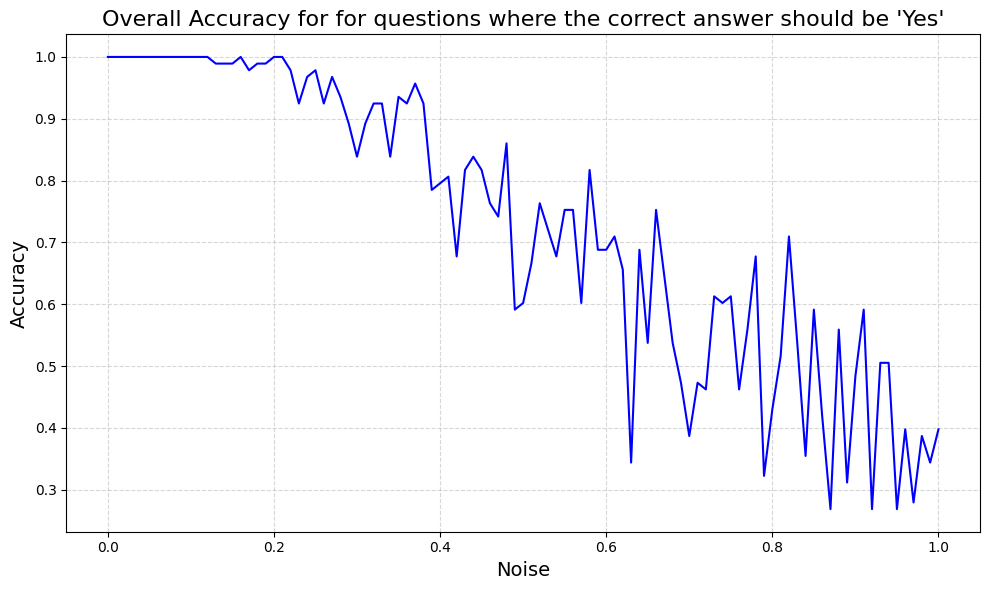

In [21]:
# 读取保存的 CSV 文件
data = pd.read_csv("noise_predictions_results.csv")

# 筛选所有正确答案为 1 的数据
yes_data = data[data["Correct Answer"] == 1]
# yes_data=data
# 绘制所有正确答案为 1 的激活值变化
plt.figure(figsize=(10, 6))
activation_means = yes_data.groupby("Noise Level")["Predicted Answer"].mean()
plt.plot(activation_means.index, activation_means.values, label="The activation values for questions where the correct answer should be 'Yes'", color="green")

plt.title("The activation values for questions where the correct answer should be 'Yes'", fontsize=16)
plt.xlabel("Noise", fontsize=14)
plt.ylabel("Activation", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# 保存图像
plt.savefig("activation_yes_answers_noise.png", dpi=300)
plt.show()

# 绘制所有正确答案为 1 的整体正确率随噪声变化
yes_accuracy = yes_data.groupby("Noise Level").apply(
    lambda x: ((x["Predicted Answer"] > 0.5).astype(int) == x["Correct Answer"]).mean()
)

plt.figure(figsize=(10, 6))
plt.plot(yes_accuracy.index, yes_accuracy.values, label="Overall Accuracy for 'Yes' Answers", color="blue")
plt.title("Overall Accuracy for for questions where the correct answer should be 'Yes'", fontsize=16)
plt.xlabel("Noise", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# 保存图像
plt.savefig("overall_accuracy_yes_answers_noise.png", dpi=300)
plt.show()
